# Creating maps and visualizing Geospatial data

## important functions
- Map()
- map.FeatureGroup()
- add child
  - vector_layers.CircleMarker
  - marker
  - plugins.MarkerCluster().add_to(sanfran_map)

In [1]:
import pandas as pd
import numpy as np
import folium

In [3]:
world_map=folium.Map()
world_map

In [4]:
world_map=folium.Map(
    location=[56.130,-106.35],
    zoom_start=4
)
world_map

In [15]:
mexico_map=folium.Map(
    location=[23.6345, -102.5528],
    zoom_start=4
)
mexico_map

### A. Cartodb dark_matter Maps

In [11]:
bangalore_map=folium.Map(
    location=[12.906013619431238, 77.58842708454559],
    zoom_start=8,
    tiles='Cartodb dark matter'
    
)
bangalore_map

In [12]:
chennai_map=folium.Map(
    location=[12.906013619431238, 77.58842708454559],
    zoom_start=8,
    tiles='Cartodb positron'
    
)
chennai_map

# Maps with Markets

In [13]:
crime_data=pd.read_csv('datasets/Police_Department_Incidents_-_Previous_Year__2016_.csv')
crime_data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [14]:
data_incidents=crime_data.iloc[:100,:]
data_incidents.shape

(100, 13)

In [16]:
incidents =folium.map.FeatureGroup()

In [41]:
for lat, lng in zip(data_incidents['Y'],data_incidents['X']):
    incidents.add_child(
        folium.vector_layers.CircleMarker(
            [lat,lng],
            radius=5,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )
lati=list(data_incidents['X'])
long=list(data_incidents['Y'])
label=list(data_incidents['Category'])

sanfran=folium.Map(location=[37.752699282905965, -122.45065757478731],zoom_start=12)


sanfran.add_child(incidents)

In [40]:
for lat,long,label in zip(list(data_incidents['Y']),list(data_incidents['X']),list(data_incidents['Category'])):
    folium.Marker([lat,long],popup=label).add_to(sanfran)
sanfran

In [44]:
for lat,long,label in zip(data_incidents['Y'],data_incidents['X'],data_incidents['Category']):
    folium.vector_layers.CircleMarker(
    [lat,long],
    radius=5,
    color='blue',
    popup=label,
    fill_color='red',
    fill_opacity=0.6,
    ).add_to(sanfran)

sanfran
    

## Clusters

In [46]:
from folium import plugins

In [51]:
sanfran_map = folium.Map(location = [37.74889885991378, -122.44585105667639], zoom_start = 12)
incidents=plugins.MarkerCluster().add_to(sanfran_map)
for lat,lng,label in zip(list(data_incidents['Y']),list(data_incidents['X']),list(data_incidents['Category'])):
    folium.Marker(
        location=[lat,lng],
        icon=None,
        popup=label,
    ).add_to(incidents)
sanfran_map

# Choropleth Maps
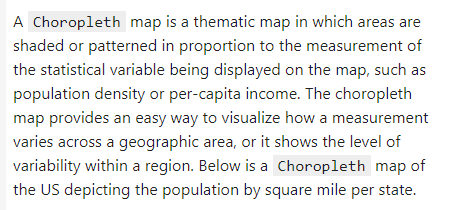
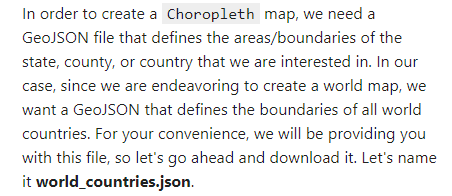

In [75]:
world_geo=pd.read_json('datasets/world_countries.json')
world_geo=world_geo.to_json()
world_geo=world_geo = r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json'

In [66]:
df_canada=pd.read_csv('datasets/Canada.csv')
df_canada.head()
df_canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    195 non-null    object
 1   Continent  195 non-null    object
 2   Region     195 non-null    object
 3   DevName    195 non-null    object
 4   1980       195 non-null    int64 
 5   1981       195 non-null    int64 
 6   1982       195 non-null    int64 
 7   1983       195 non-null    int64 
 8   1984       195 non-null    int64 
 9   1985       195 non-null    int64 
 10  1986       195 non-null    int64 
 11  1987       195 non-null    int64 
 12  1988       195 non-null    int64 
 13  1989       195 non-null    int64 
 14  1990       195 non-null    int64 
 15  1991       195 non-null    int64 
 16  1992       195 non-null    int64 
 17  1993       195 non-null    int64 
 18  1994       195 non-null    int64 
 19  1995       195 non-null    int64 
 20  1996       195 non-null    int64

In [58]:
world_map=folium.Map(location=[0,0],zoom_start=6)
world_map

In [85]:
world_map=folium.Map(location=[13.052704563832188, 77.6134505790627],zoom_start=3)
folium.Choropleth(
    geo_data=world_geo,
    data=df_canada,
    columns=['Country','Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
).add_to(world_map)
world_map